In [20]:
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
%matplotlib inline

In [4]:
def encode_lable(y, num_classes):
    y_gt = np.zeros((len(y), num_classes))
    for i in range(0, len(y)):
        y_gt[i, y[i]] = 1
    return y_gt

In [5]:
(dx_train, dy_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print('x_train shape:', dx_train.shape)
print(dx_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
dy_train = encode_lable(dy_train, 10)
y_test = encode_lable(y_test, 10)

In [8]:
dx_train = np.asarray([list(x.flat) for x in dx_train])
x_test = np.asarray([list(x.flat) for x in x_test])

In [9]:
p = np.random.permutation(dx_train.shape[0])
x_train = dx_train[p[0:int(len(dx_train)*0.8)], :]
y_train = dy_train[p[0:int(len(dx_train)*0.8)]]
x_val = dx_train[p[int(len(dx_train)*0.8):], :]
y_val = dy_train[p[int(len(dx_train)*0.8):]]
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 3072)
y_train shape: (40000, 10)
x_val shape: (10000, 3072)
y_val shape: (10000, 10)
x_test shape: (10000, 3072)
y_test shape: (10000, 10)


In [10]:
x_train = (x_train - np.mean(x_train, axis = 0)) / np.var(x_train, axis = 0)
x_val = (x_val - np.mean(x_val, axis = 0)) / np.var(x_val, axis = 0)
x_test = (x_test - np.mean(x_test, axis = 0)) / np.var(x_test, axis = 0)

In [23]:
model = Sequential()
#model.add(Dense(10, activation='sigmoid', input_dim=3072))
model.add(Dense(128, activation='sigmoid', input_dim=3072))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [24]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=600, batch_size=1000)

Train on 40000 samples, validate on 10000 samples
Epoch 1/600
40000/40000 [==============================] - 3s 64us/step - loss: 2.3212 - acc: 0.1011 - val_loss: 2.2947 - val_acc: 0.1212
Epoch 2/600
40000/40000 [==============================] - 2s 54us/step - loss: 2.3022 - acc: 0.1120 - val_loss: 2.2733 - val_acc: 0.2205
Epoch 3/600
40000/40000 [==============================] - 2s 54us/step - loss: 2.2670 - acc: 0.1357 - val_loss: 2.2163 - val_acc: 0.1901
Epoch 4/600
40000/40000 [==============================] - 2s 54us/step - loss: 2.2117 - acc: 0.1606 - val_loss: 2.1541 - val_acc: 0.1909
Epoch 5/600
40000/40000 [==============================] - 2s 60us/step - loss: 2.1663 - acc: 0.1698 - val_loss: 2.1115 - val_acc: 0.1917
Epoch 6/600
40000/40000 [==============================] - 3s 75us/step - loss: 2.1369 - acc: 0.1737 - val_loss: 2.0841 - val_acc: 0.2130
Epoch 7/600
40000/40000 [==============================] - 2s 51us/step - loss: 2.1180 - acc: 0.1796 - val_loss: 2.0687 - 

40000/40000 [==============================] - 2s 53us/step - loss: 1.9228 - acc: 0.2733 - val_loss: 1.8559 - val_acc: 0.2917
Epoch 60/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.9207 - acc: 0.2682 - val_loss: 1.8542 - val_acc: 0.2934
Epoch 61/600
40000/40000 [==============================] - 2s 52us/step - loss: 1.9204 - acc: 0.2713 - val_loss: 1.8535 - val_acc: 0.2963
Epoch 62/600
40000/40000 [==============================] - 3s 64us/step - loss: 1.9160 - acc: 0.2709 - val_loss: 1.8505 - val_acc: 0.2997
Epoch 63/600
40000/40000 [==============================] - 3s 68us/step - loss: 1.9164 - acc: 0.2726 - val_loss: 1.8491 - val_acc: 0.3032
Epoch 64/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.9126 - acc: 0.2726 - val_loss: 1.8468 - val_acc: 0.3023
Epoch 65/600
40000/40000 [==============================] - 2s 49us/step - loss: 1.9135 - acc: 0.2764 - val_loss: 1.8453 - val_acc: 0.3042
Epoch 66/600
40000/40000 [==============

Epoch 118/600
40000/40000 [==============================] - 3s 71us/step - loss: 1.8409 - acc: 0.3057 - val_loss: 1.7667 - val_acc: 0.3496
Epoch 119/600
40000/40000 [==============================] - 2s 48us/step - loss: 1.8444 - acc: 0.3074 - val_loss: 1.7661 - val_acc: 0.3502
Epoch 120/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.8440 - acc: 0.3040 - val_loss: 1.7646 - val_acc: 0.3473
Epoch 121/600
40000/40000 [==============================] - 2s 51us/step - loss: 1.8434 - acc: 0.3055 - val_loss: 1.7633 - val_acc: 0.3521
Epoch 122/600
40000/40000 [==============================] - 2s 51us/step - loss: 1.8391 - acc: 0.3088 - val_loss: 1.7612 - val_acc: 0.3537
Epoch 123/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.8415 - acc: 0.3089 - val_loss: 1.7611 - val_acc: 0.3539
Epoch 124/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.8361 - acc: 0.3081 - val_loss: 1.7587 - val_acc: 0.3556
Epoch 125/600
40000/

40000/40000 [==============================] - 2s 52us/step - loss: 1.7860 - acc: 0.3357 - val_loss: 1.7016 - val_acc: 0.3785
Epoch 177/600
40000/40000 [==============================] - 2s 46us/step - loss: 1.7824 - acc: 0.3347 - val_loss: 1.7004 - val_acc: 0.3810
Epoch 178/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.7850 - acc: 0.3347 - val_loss: 1.6995 - val_acc: 0.3801
Epoch 179/600
40000/40000 [==============================] - 2s 52us/step - loss: 1.7858 - acc: 0.3356 - val_loss: 1.6984 - val_acc: 0.3813
Epoch 180/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.7794 - acc: 0.3319 - val_loss: 1.6976 - val_acc: 0.3813
Epoch 181/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.7829 - acc: 0.3317 - val_loss: 1.6965 - val_acc: 0.3811
Epoch 182/600
40000/40000 [==============================] - 3s 64us/step - loss: 1.7799 - acc: 0.3345 - val_loss: 1.6959 - val_acc: 0.3818
Epoch 183/600
40000/40000 [=======

40000/40000 [==============================] - 2s 54us/step - loss: 1.7405 - acc: 0.3529 - val_loss: 1.6493 - val_acc: 0.3955
Epoch 235/600
40000/40000 [==============================] - 2s 54us/step - loss: 1.7445 - acc: 0.3502 - val_loss: 1.6492 - val_acc: 0.3967
Epoch 236/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.7341 - acc: 0.3536 - val_loss: 1.6477 - val_acc: 0.3965
Epoch 237/600
40000/40000 [==============================] - 2s 56us/step - loss: 1.7369 - acc: 0.3535 - val_loss: 1.6457 - val_acc: 0.3967
Epoch 238/600
40000/40000 [==============================] - 3s 72us/step - loss: 1.7394 - acc: 0.3541 - val_loss: 1.6453 - val_acc: 0.3977
Epoch 239/600
40000/40000 [==============================] - 2s 51us/step - loss: 1.7315 - acc: 0.3542 - val_loss: 1.6436 - val_acc: 0.3976
Epoch 240/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.7404 - acc: 0.3532 - val_loss: 1.6434 - val_acc: 0.3992
Epoch 241/600
40000/40000 [=======

40000/40000 [==============================] - 2s 52us/step - loss: 1.7039 - acc: 0.3649 - val_loss: 1.6082 - val_acc: 0.4115
Epoch 293/600
40000/40000 [==============================] - 2s 53us/step - loss: 1.7060 - acc: 0.3645 - val_loss: 1.6076 - val_acc: 0.4127
Epoch 294/600
40000/40000 [==============================] - 3s 68us/step - loss: 1.7001 - acc: 0.3686 - val_loss: 1.6062 - val_acc: 0.4121
Epoch 295/600
40000/40000 [==============================] - 2s 62us/step - loss: 1.6984 - acc: 0.3721 - val_loss: 1.6058 - val_acc: 0.4131
Epoch 296/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.7015 - acc: 0.3693 - val_loss: 1.6040 - val_acc: 0.4144
Epoch 297/600
40000/40000 [==============================] - 2s 51us/step - loss: 1.7038 - acc: 0.3697 - val_loss: 1.6041 - val_acc: 0.4135
Epoch 298/600
40000/40000 [==============================] - 2s 46us/step - loss: 1.7017 - acc: 0.3700 - val_loss: 1.6038 - val_acc: 0.4151
Epoch 299/600
40000/40000 [=======

40000/40000 [==============================] - 2s 43us/step - loss: 1.6827 - acc: 0.3758 - val_loss: 1.5765 - val_acc: 0.4215
Epoch 351/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6748 - acc: 0.3798 - val_loss: 1.5760 - val_acc: 0.4221
Epoch 352/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6668 - acc: 0.3810 - val_loss: 1.5761 - val_acc: 0.4222
Epoch 353/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6758 - acc: 0.3789 - val_loss: 1.5759 - val_acc: 0.4218
Epoch 354/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6752 - acc: 0.3800 - val_loss: 1.5760 - val_acc: 0.4221
Epoch 355/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6695 - acc: 0.3797 - val_loss: 1.5741 - val_acc: 0.4214
Epoch 356/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6798 - acc: 0.3810 - val_loss: 1.5752 - val_acc: 0.4242
Epoch 357/600
40000/40000 [=======

40000/40000 [==============================] - 2s 44us/step - loss: 1.6464 - acc: 0.3908 - val_loss: 1.5539 - val_acc: 0.4267
Epoch 409/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6497 - acc: 0.3863 - val_loss: 1.5554 - val_acc: 0.4261
Epoch 410/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6433 - acc: 0.3888 - val_loss: 1.5541 - val_acc: 0.4281
Epoch 411/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6466 - acc: 0.3933 - val_loss: 1.5532 - val_acc: 0.4261
Epoch 412/600
40000/40000 [==============================] - 2s 45us/step - loss: 1.6473 - acc: 0.3904 - val_loss: 1.5527 - val_acc: 0.4280
Epoch 413/600
40000/40000 [==============================] - 2s 47us/step - loss: 1.6491 - acc: 0.3888 - val_loss: 1.5523 - val_acc: 0.4284
Epoch 414/600
40000/40000 [==============================] - 2s 51us/step - loss: 1.6482 - acc: 0.3921 - val_loss: 1.5511 - val_acc: 0.4289
Epoch 415/600
40000/40000 [=======

40000/40000 [==============================] - 2s 44us/step - loss: 1.6260 - acc: 0.3989 - val_loss: 1.5343 - val_acc: 0.4344
Epoch 467/600
40000/40000 [==============================] - 2s 46us/step - loss: 1.6267 - acc: 0.3964 - val_loss: 1.5340 - val_acc: 0.4350
Epoch 468/600
40000/40000 [==============================] - 2s 45us/step - loss: 1.6236 - acc: 0.4000 - val_loss: 1.5338 - val_acc: 0.4360
Epoch 469/600
40000/40000 [==============================] - 2s 46us/step - loss: 1.6263 - acc: 0.4007 - val_loss: 1.5328 - val_acc: 0.4338
Epoch 470/600
40000/40000 [==============================] - 2s 47us/step - loss: 1.6231 - acc: 0.3979 - val_loss: 1.5334 - val_acc: 0.4353
Epoch 471/600
40000/40000 [==============================] - 2s 45us/step - loss: 1.6233 - acc: 0.4009 - val_loss: 1.5334 - val_acc: 0.4359
Epoch 472/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.6327 - acc: 0.3972 - val_loss: 1.5328 - val_acc: 0.4357
Epoch 473/600
40000/40000 [=======

40000/40000 [==============================] - 2s 44us/step - loss: 1.6071 - acc: 0.4072 - val_loss: 1.5189 - val_acc: 0.4397
Epoch 525/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.6060 - acc: 0.4060 - val_loss: 1.5196 - val_acc: 0.4405
Epoch 526/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.6070 - acc: 0.4073 - val_loss: 1.5189 - val_acc: 0.4409
Epoch 527/600
40000/40000 [==============================] - 2s 46us/step - loss: 1.6104 - acc: 0.4048 - val_loss: 1.5189 - val_acc: 0.4387
Epoch 528/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.6019 - acc: 0.4082 - val_loss: 1.5205 - val_acc: 0.4385
Epoch 529/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.6048 - acc: 0.4049 - val_loss: 1.5193 - val_acc: 0.4402
Epoch 530/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.6068 - acc: 0.4077 - val_loss: 1.5193 - val_acc: 0.4405
Epoch 531/600
40000/40000 [=======

40000/40000 [==============================] - 2s 45us/step - loss: 1.5917 - acc: 0.4149 - val_loss: 1.5074 - val_acc: 0.4449
Epoch 583/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.5939 - acc: 0.4134 - val_loss: 1.5075 - val_acc: 0.4443
Epoch 584/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.5915 - acc: 0.4132 - val_loss: 1.5082 - val_acc: 0.4438
Epoch 585/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.5871 - acc: 0.4109 - val_loss: 1.5068 - val_acc: 0.4451
Epoch 586/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.5881 - acc: 0.4110 - val_loss: 1.5064 - val_acc: 0.4446
Epoch 587/600
40000/40000 [==============================] - 2s 43us/step - loss: 1.5859 - acc: 0.4133 - val_loss: 1.5078 - val_acc: 0.4435
Epoch 588/600
40000/40000 [==============================] - 2s 44us/step - loss: 1.5841 - acc: 0.4146 - val_loss: 1.5067 - val_acc: 0.4457
Epoch 589/600
40000/40000 [=======

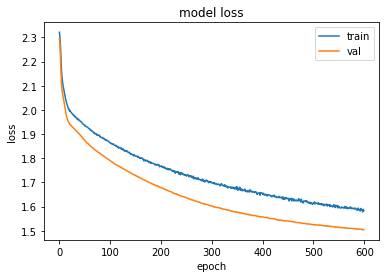

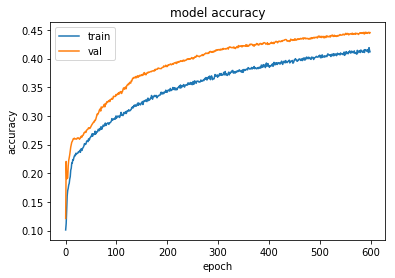

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
'''
--------Without hidden layers--------
Test loss: 1.7369774152755737
Test accuracy: 0.3934
--------One hidden 64 layer-------
Test loss: 1.452355881881714
Test accuracy: 0.4857
'''
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 65us/step
Test loss: 1.487240909576416
Test accuracy: 0.4512
